In [15]:
### importing libraries 
import numpy as np
import pandas as pd

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

# Importing Data

In [18]:
Train_Data=pd.read_csv('train.csv')

In [19]:
Test_Data=pd.read_csv('Test.csv')

In [20]:
Sample_Data=pd.read_csv('sample_submission.csv')

###  IMPUTINGDATA 

In [61]:
print (Train_Data.shape)
Train_Data.head(10)

(21626, 9)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,1,0,1,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,0,0,1,2.0,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,1,1,0,3.0,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,1,1,1,2.0,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,1,1,0,3.0,6.0,5.9,0.56
9,fffe31003600320030003200,2008-03-09,1,0,0,3.0,6.0,5.9,0.67


In [22]:
Test_Data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


In [23]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [24]:
### Checkinh null val per column 
Train_Data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [56]:
## remove burn rate null values by droping the entries
Train_Data.dropna(subset = ["Burn Rate",'Resource Allocation','Mental Fatigue Score'], inplace=True)
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           21626 non-null  object 
 1   Date of Joining       21626 non-null  object 
 2   Gender                21626 non-null  object 
 3   Company Type          21626 non-null  object 
 4   WFH Setup Available   21626 non-null  object 
 5   Designation           21626 non-null  float64
 6   Resource Allocation   21626 non-null  float64
 7   Mental Fatigue Score  21626 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [57]:
Train_Data.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

### VISUALIZING DATA  

In [36]:
### BURN RATE V/S GENDER 
Train_Data[['Gender', 'Burn Rate']].groupby('Gender').agg('mean')


,Burn Rate
Gender,
Female,0.422788
Male,0.484271


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='Gender'>

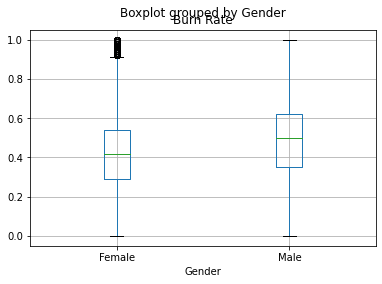

In [35]:
Train_Data.boxplot(column=['Burn Rate'], by='Gender')


In [37]:
### thus gender affects burn rate but not much 

In [38]:
### BURN RATE V/S WFH AVAILABILITY
Train_Data[['WFH Setup Available', 'Burn Rate']].groupby('WFH Setup Available').agg('mean')

,Burn Rate
WFH Setup Available,
No,0.517824
Yes,0.396010


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='WFH Setup Available'>

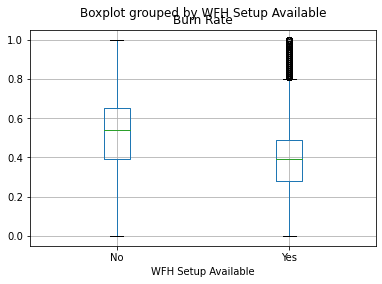

In [39]:
### high corr between wfh setub availability and burn rate 
Train_Data.boxplot(column=['Burn Rate'],by='WFH Setup Available')

In [42]:
### BURN RATE V/S COMPANY TYPE 
Train_Data[['Company Type', 'Burn Rate']].groupby('Company Type').agg('mean')

,Burn Rate
Company Type,
Product,0.450841
Service,0.452624


In [43]:
### company type does not really affect burn rate 

In [47]:
### BURN RATE V/S DESIGNATION 
Train_Data[['Designation','Burn Rate']].groupby('Designation').agg('mean')
### relation is almost linear 

,Burn Rate
Designation,
0.0,0.151015
1.0,0.308133
2.0,0.435472
3.0,0.545460
4.0,0.686690
5.0,0.856995


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='Designation'>

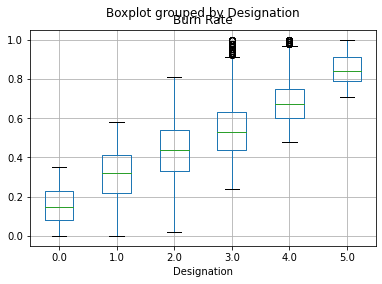

In [48]:
Train_Data.boxplot(column=['Burn Rate'], by='Designation')

In [49]:
### burn rate vs resource allocation i.e no of working hours 
Train_Data[['Resource Allocation','Burn Rate']].groupby('Resource Allocation').agg('mean')

,Burn Rate
Resource Allocation,
1.0,0.137572
2.0,0.253410
3.0,0.340330
4.0,0.426056
5.0,0.493428
6.0,0.576823
7.0,0.654707
8.0,0.736401
9.0,0.830911


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='Resource Allocation'>

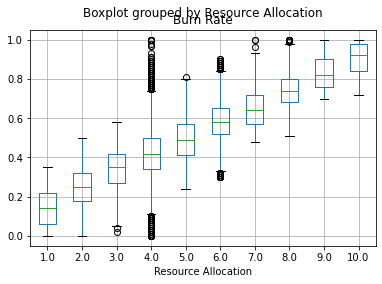

In [51]:
Train_Data.boxplot(column=['Burn Rate'], by='Resource Allocation')

In [52]:
### BURN RATE V/S MENTAL FATIGUE 
Train_Data[['Mental Fatigue Score','Burn Rate']].groupby('Mental Fatigue Score').agg('mean')

,Burn Rate
Mental Fatigue Score,
0.0,0.001341
0.1,0.011333
0.2,0.005455
0.3,0.020909
0.4,0.008750
...,...
9.6,0.865625
9.7,0.878378
9.8,0.893250


<AxesSubplot:title={'center':'Burn Rate'}, xlabel='Mental Fatigue Score'>

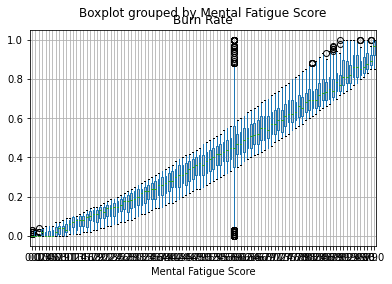

In [54]:
Train_Data.boxplot(column=['Burn Rate'], by='Mental Fatigue Score')

### CONVERTING CATEGORICAL VARIABLES  

In [58]:
def gender_encoder(data):
    if data["Gender"] == "Female":
        return 1
    return 0


def wfh_setup_encoder(data):
    if data["WFH Setup Available"] == "Yes":
        return 1
    return 0


def company_encoder(data):
    if data["Company Type"] == "Service":
        return 1
    return 0



Train_Data["Gender"] = Train_Data.apply(gender_encoder, axis=1)
Train_Data["WFH Setup Available"] = Train_Data.apply(wfh_setup_encoder, axis=1)
Train_Data["Company Type"] = Train_Data.apply(company_encoder, axis=1)

Test_Data["Gender"] = Test_Data.apply(gender_encoder, axis=1)
Test_Data["WFH Setup Available"] = Test_Data.apply(wfh_setup_encoder, axis=1)
Test_Data["Company Type"] = Test_Data.apply(company_encoder, axis=1)

In [63]:
Train_Data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,1,0,1,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52
5,fffe3300350037003500,2008-11-26,0,0,1,2.0,4.0,3.6,0.29
6,fffe33003300340039003100,2008-01-02,1,1,0,3.0,6.0,7.9,0.62
7,fffe32003600320037003400,2008-10-31,1,1,1,2.0,4.0,4.4,0.33
8,fffe32003200300034003700,2008-12-27,1,1,0,3.0,6.0,5.9,0.56
9,fffe31003600320030003200,2008-03-09,1,0,0,3.0,6.0,5.9,0.67


### STUDYING CORRELATION OF DATA  

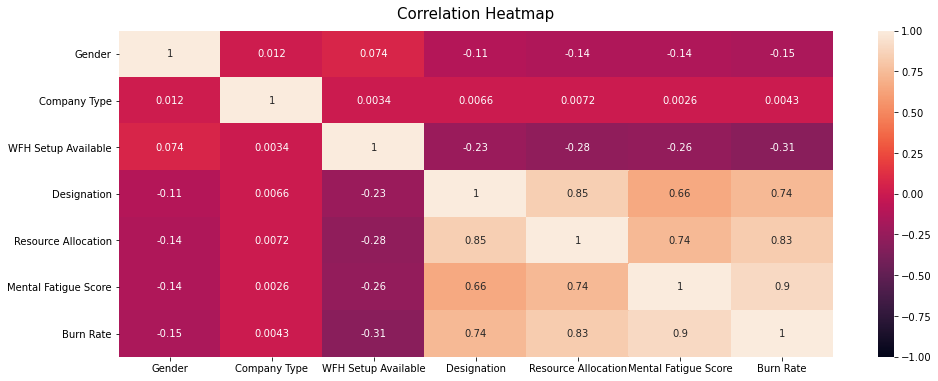

In [66]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(Train_Data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);
plt.savefig("correlation_heatmap.png")

### CATEGORISING DATA 

In [64]:
### categorizing mental fatigue levels 
def categorize_Mental_Fatigue(data):
    if data["Mental Fatigue Score"] <= 4.0:
        return 0
    if data["Mental Fatigue Score"] > 4.0 and data["Mental Fatigue Score"] <= 5.0:
        return 1
    if data["Mental Fatigue Score"] > 5.0 and data["Mental Fatigue Score"] <= 6.0:
        return 2
    if data["Mental Fatigue Score"] > 6.0 and data["Mental Fatigue Score"] <= 7.0:
        return 3
    if data["Mental Fatigue Score"] > 7.0:
        return 4
    return -1

In [67]:
Train_Data["Categorize Mental Fatigue"] = Train_Data.apply(categorize_Mental_Fatigue, axis=1)
Test_Data["Categorize Mental Fatigue"] = Test_Data.apply(categorize_Mental_Fatigue, axis=1)
Train_Data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Categorize Mental Fatigue
0,fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16,0
1,fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36,1
2,fffe31003300320037003900,2008-03-10,1,0,1,2.0,4.0,5.8,0.49,2
3,fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20,0
4,fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52,3
5,fffe3300350037003500,2008-11-26,0,0,1,2.0,4.0,3.6,0.29,0
6,fffe33003300340039003100,2008-01-02,1,1,0,3.0,6.0,7.9,0.62,4
7,fffe32003600320037003400,2008-10-31,1,1,1,2.0,4.0,4.4,0.33,1
8,fffe32003200300034003700,2008-12-27,1,1,0,3.0,6.0,5.9,0.56,2
9,fffe31003600320030003200,2008-03-09,1,0,0,3.0,6.0,5.9,0.67,2


In [68]:
### CONVERTING COLUMN DATE OF JOINING TO MORE USEFULT DATA 

In [71]:
Date_Today = pd.to_datetime('today')

Train_Data["Date of Joining"] = pd.to_datetime(Train_Data["Date of Joining"])
Test_Data["Date of Joining"] = pd.to_datetime(Test_Data["Date of Joining"])

In [72]:
### create a func to calc no. of working days of employee since joining the company 
def create_days_count(data):
    return (Date_Today - data["Date of Joining"])

Train_Data["days_count"] = Train_Data.apply(create_days_count, axis=1)
Train_Data["days_count"] = Train_Data["days_count"].dt.days

Test_Data["days_count"] = Test_Data.apply(create_days_count, axis=1)
Test_Data["days_count"] = Test_Data["days_count"].dt.days

In [73]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21626 entries, 0 to 22749
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Employee ID                21626 non-null  object        
 1   Date of Joining            21626 non-null  datetime64[ns]
 2   Gender                     21626 non-null  int64         
 3   Company Type               21626 non-null  int64         
 4   WFH Setup Available        21626 non-null  int64         
 5   Designation                21626 non-null  float64       
 6   Resource Allocation        21626 non-null  float64       
 7   Mental Fatigue Score       21626 non-null  float64       
 8   Burn Rate                  21626 non-null  float64       
 9   Categorize Mental Fatigue  21626 non-null  int64         
 10  days_count                 21626 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage:

In [74]:
Train_Data.head(15)

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Categorize Mental Fatigue,days_count
0,fffe32003000360033003200,2008-09-30,1,1,0,2.0,3.0,3.8,0.16,0,4748
1,fffe3700360033003500,2008-11-30,0,1,1,1.0,2.0,5.0,0.36,1,4687
2,fffe31003300320037003900,2008-03-10,1,0,1,2.0,4.0,5.8,0.49,2,4952
3,fffe32003400380032003900,2008-11-03,0,1,1,1.0,1.0,2.6,0.20,0,4714
4,fffe31003900340031003600,2008-07-24,1,1,0,3.0,7.0,6.9,0.52,3,4816
5,fffe3300350037003500,2008-11-26,0,0,1,2.0,4.0,3.6,0.29,0,4691
6,fffe33003300340039003100,2008-01-02,1,1,0,3.0,6.0,7.9,0.62,4,5020
7,fffe32003600320037003400,2008-10-31,1,1,1,2.0,4.0,4.4,0.33,1,4717
8,fffe32003200300034003700,2008-12-27,1,1,0,3.0,6.0,5.9,0.56,2,4660
9,fffe31003600320030003200,2008-03-09,1,0,0,3.0,6.0,5.9,0.67,2,4953


In [75]:
### drop useless columns
Train_Data.drop(['Date of Joining', "Employee ID"], axis=1, inplace=True)
Test_Data.drop(['Date of Joining', "Employee ID"], axis=1, inplace=True)

In [76]:
Train_Data.head(15)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Categorize Mental Fatigue,days_count
0,1,1,0,2.0,3.0,3.8,0.16,0,4748
1,0,1,1,1.0,2.0,5.0,0.36,1,4687
2,1,0,1,2.0,4.0,5.8,0.49,2,4952
3,0,1,1,1.0,1.0,2.6,0.20,0,4714
4,1,1,0,3.0,7.0,6.9,0.52,3,4816
5,0,0,1,2.0,4.0,3.6,0.29,0,4691
6,1,1,0,3.0,6.0,7.9,0.62,4,5020
7,1,1,1,2.0,4.0,4.4,0.33,1,4717
8,1,1,0,3.0,6.0,5.9,0.56,2,4660
9,1,0,0,3.0,6.0,5.9,0.67,2,4953
